In [91]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import plotly
from plotly.graph_objs import *
import networkx as nx
import plotly.graph_objs as go
import networkx as nx
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
# Import bibliometrics data in python
c1 = pd.read_excel('c1.xlsx')

In [5]:
#Download the codes of coluns in database Web of Science and replace with full labels
def colunas(dataframe):
    page = requests.get("https://images.webofknowledge.com/images/help/WOS/hs_wos_fieldtags.html")
    soup = BeautifulSoup(page.content, 'html.parser')
    cod = soup.find('td').find_all('strong')
    trad = soup.find('td').find_all('p')
    traducao = [tr.get_text() for tr in trad]
    codigo = [c.get_text() for c in cod]
    del traducao[0]
    index = dataframe.columns
    nc = []
    for x in index:
        nc.append(traducao[codigo.index(x)])
    dataframe.columns = nc
    return dataframe

In [6]:
c1novo = colunas(c1)

In [8]:
#Create new dataframe for list all cods of publication and authors in rows 
i = 0
autores = pd.DataFrame()
for index, row in c1.iterrows():    
    if(';' in row['Authors']):    
        for x in row['Authors'].split(';'):            
            autores= autores.append(pd.DataFrame({'Codigo': i, 'Titulo': row['Document Title'], 'Autores': x}, index=[0]), ignore_index=True, sort=False)            
    else:
        autores= autores.append(pd.DataFrame({'Codigo': i, 'Titulo': row['Document Title'], 'Autores': row['Authors']}, index=[0]), ignore_index=True, sort=False)                
    i = i + 1

In [9]:
# This section convert simple table data in pivot table, similar of excel. More information https://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html
pivottable = pd.pivot_table(autores, values='Titulo', index=['Autores'], columns=['Codigo'],aggfunc=np.count_nonzero, fill_value=0)

In [11]:
piv = pivottable.dot(pivottable.T)

In [13]:
# https://www.kaggle.com/tianyiwang/neighborhood-interaction-with-network-graph
# https://www.analyticsvidhya.com/blog/2018/04/introduction-to-graph-theory-network-analysis-python-codes/

In [101]:
# Creating a Graph 
G = nx.Graph() # Right now G is empty

df = pd.DataFrame(piv.sum())

# Add a node
for x in range(len(piv.values)):
    G.add_node(str(piv.index[x]), weight=df.iloc[x])

# Add edges 
for autores in range(len(piv.values)):    
    for x in range(len(piv.values)):
        if(piv.values[autores][x] >= 1):
            G.add_edge(piv.index[autores],piv.index[x], weight=piv.values[autores][x])

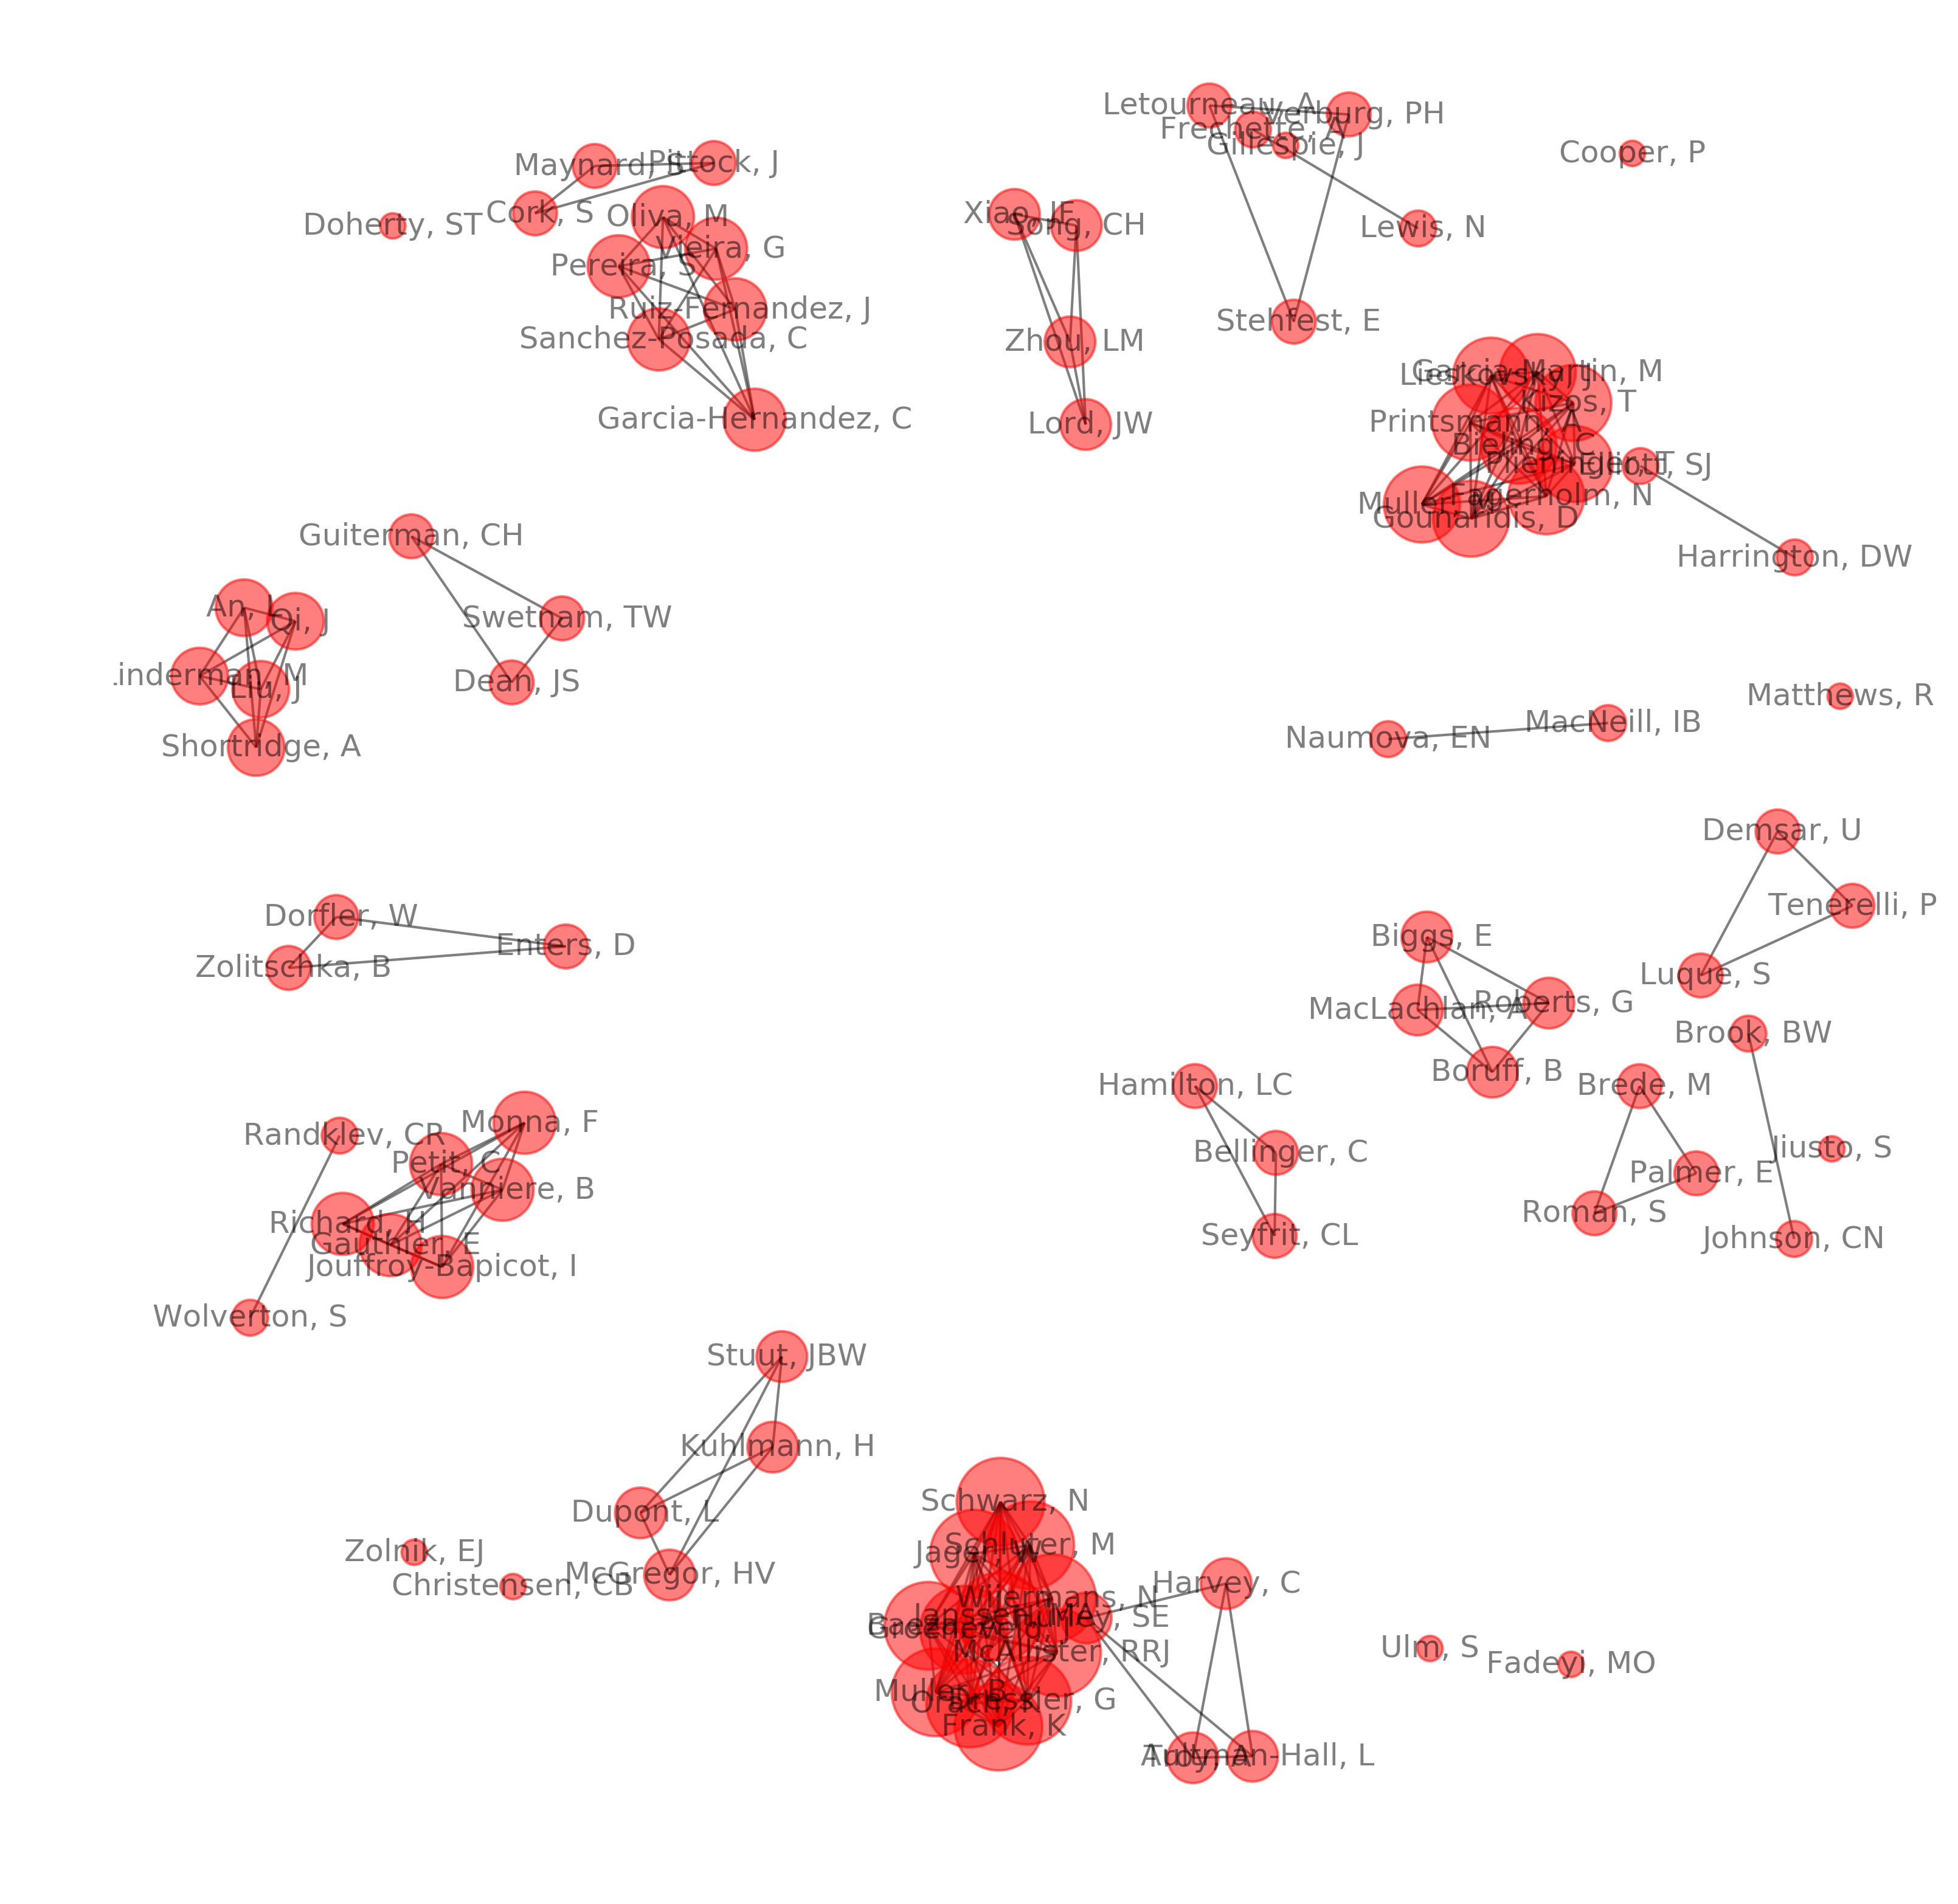

In [102]:
figure(num=None, figsize=(10, 10), dpi=300, facecolor='w', edgecolor='k')

pos = nx.spring_layout(G, k=0.35, iterations=50)

nx.draw(G,with_labels=True, alpha = 0.5, pos=pos, node_size=[v * 100 for v in df.values])

In [38]:
import pygraphviz as pgv
# Let us create another Graph where we can individually control the colour of each node
B = pgv.AGraph()

# Setting node attributes that are common for all nodes 
B.node_attr['style']='filled'
B.node_attr['shape']='circle'
B.node_attr['fixedsize']='true'
B.node_attr['fontcolor']='#FFFFFF'


ModuleNotFoundError: No module named 'pygraphviz'

In [51]:
for x in range(len(piv)):
#     print(piv.values[x][x])   
    print(piv.key)
    break

AttributeError: 'DataFrame' object has no attribute 'key'

In [63]:
for x in piv.index:
    print(x)
    break

 Aultman-Hall, L


In [84]:
# Add a node
for x in range(len(piv.values)):
    print(piv.index[x])   
    

 Aultman-Hall, L
 Baeza, A
 Bellinger, C
 Bieling, C
 Biggs, E
 Boruff, B
 Brede, M
 Brook, BW
 Cork, S
 Dean, JS
 Demsar, U
 Dorfler, W
 Dressler, G
 Dupont, L
 Elliott, SJ
 Fagerholm, N
 Frank, K
 Gauthier, E
 Gounaridis, D
 Groeneveld, J
 Hurley, SE
 Jager, W
 Janssen, MA
 Kizos, T
 Kuhlmann, H
 Lewis, N
 Lieskovsky, J
 Linderman, M
 Liu, J
 Lord, JW
 Luque, S
 MacNeill, IB
 Maynard, S
 McAllister, RRJ
 Monna, F
 Muller, B
 Muller, M
 Oliva, M
 Orach, K
 Palmer, E
 Pereira, S
 Petit, C
 Plieninger, T
 Printsmann, A
 Qi, J
 Randklev, CR
 Richard, H
 Roberts, G
 Ruiz-Fernandez, J
 Sanchez-Posada, C
 Schwarz, N
 Seyfrit, CL
 Shortridge, A
 Stehfest, E
 Stuut, JBW
 Swetnam, TW
 Troy, A
 Vanniere, B
 Verburg, PH
 Vieira, G
 Wijermans, N
 Xiao, JF
 Zhou, LM
 Zolitschka, B
An, L
Christensen, CB
Cooper, P
Doherty, ST
Enters, D
Fadeyi, MO
Frechette, A
Garcia-Hernandez, C
Garcia-Martin, M
Gillespie, J
Guiterman, CH
Hamilton, LC
Harrington, DW
Harvey, C
Jiusto, S
Johnson, CN
Jouffroy-Bapicot, 

In [85]:
piv.index

Index([' Aultman-Hall, L', ' Baeza, A', ' Bellinger, C', ' Bieling, C',
       ' Biggs, E', ' Boruff, B', ' Brede, M', ' Brook, BW', ' Cork, S',
       ' Dean, JS', ' Demsar, U', ' Dorfler, W', ' Dressler, G', ' Dupont, L',
       ' Elliott, SJ', ' Fagerholm, N', ' Frank, K', ' Gauthier, E',
       ' Gounaridis, D', ' Groeneveld, J', ' Hurley, SE', ' Jager, W',
       ' Janssen, MA', ' Kizos, T', ' Kuhlmann, H', ' Lewis, N',
       ' Lieskovsky, J', ' Linderman, M', ' Liu, J', ' Lord, JW', ' Luque, S',
       ' MacNeill, IB', ' Maynard, S', ' McAllister, RRJ', ' Monna, F',
       ' Muller, B', ' Muller, M', ' Oliva, M', ' Orach, K', ' Palmer, E',
       ' Pereira, S', ' Petit, C', ' Plieninger, T', ' Printsmann, A',
       ' Qi, J', ' Randklev, CR', ' Richard, H', ' Roberts, G',
       ' Ruiz-Fernandez, J', ' Sanchez-Posada, C', ' Schwarz, N',
       ' Seyfrit, CL', ' Shortridge, A', ' Stehfest, E', ' Stuut, JBW',
       ' Swetnam, TW', ' Troy, A', ' Vanniere, B', ' Verburg, PH',
     